# **Projet réalisé en binome par :**
- **Amcassou Hanane**
- **Benakka Zaid**

# Imports des premières bibliothèques et montage du drive

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# --- Montage de Google Drive ---
# Cela demandera une autorisation
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')
else:
    print("Google Drive est déjà monté.")

Google Drive est déjà monté.


# Chargement et aperçu du dataset M5 Forecast

In [ ]:
# --- Définir les chemins ---
base_path = '/content/drive/My Drive/'
project_path = os.path.join(base_path, '/Livrable_M5_TimeSeries/M5_project/')
# Chemin vers le dossier contenant les CSV
data_path = os.path.join(project_path, 'm5-forecasting-data/')

# Chemins vers les fichiers CSV
sales_path = os.path.join(data_path, 'sales_train_validation.csv')
calendar_path = os.path.join(data_path, 'calendar.csv')
prices_path = os.path.join(data_path, 'sell_prices.csv')

# --- Vérifier que le dossier de données existe ---
if not os.path.exists(data_path):
    print(f"ERREUR : Le dossier '{data_path}' n'a pas été trouvé.")
    print("Veuillez vérifier le chemin et le nom du dossier.")
else:
    print(f"Dossier de données trouvé : '{data_path}'")

Dossier de données trouvé : '/content/drive/My Drive/M5_project/m5-forecasting-data/'


In [ ]:
print("Chargement des fichiers CSV")

try:
    # Charger les ventes
    sales_df = pd.read_csv(sales_path)
    print(f"sales_train_validation.csv chargé. (Dimensions : {sales_df.shape})")

    # Charger le calendrier (en parsant la colonne 'date')
    calendar_df = pd.read_csv(calendar_path, parse_dates=['date'])
    print(f"calendar.csv chargé. (Dimensions : {calendar_df.shape})")

    # Charger les prix
    prices_df = pd.read_csv(prices_path)
    print(f"sell_prices.csv chargé. (Dimensions : {prices_df.shape})")

except FileNotFoundError as e:
    print(f"ERREUR lors du chargement d'un fichier : {e}")
    print("Vérifiez que tous les fichiers CSV sont bien présents dans le dossier.")

print("\n--- Aperçu des données chargées ---")

if 'sales_df' in locals():
    print("\nAperçu des Ventes (sales_df) :")
    display(sales_df.head())

if 'calendar_df' in locals():
    print("\nAperçu du Calendrier (calendar_df) :")
    display(calendar_df.head())

if 'prices_df' in locals():
    print("\nAperçu des Prix (prices_df) :")
    display(prices_df.head())

Chargement des fichiers CSV
sales_train_validation.csv chargé. (Dimensions : (30490, 1919))
calendar.csv chargé. (Dimensions : (1969, 14))
sell_prices.csv chargé. (Dimensions : (6841121, 4))

--- Aperçu des données chargées ---

Aperçu des Ventes (sales_df) :


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4



Aperçu du Calendrier (calendar_df) :


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1



Aperçu des Prix (prices_df) :


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


# Tendance du dataset

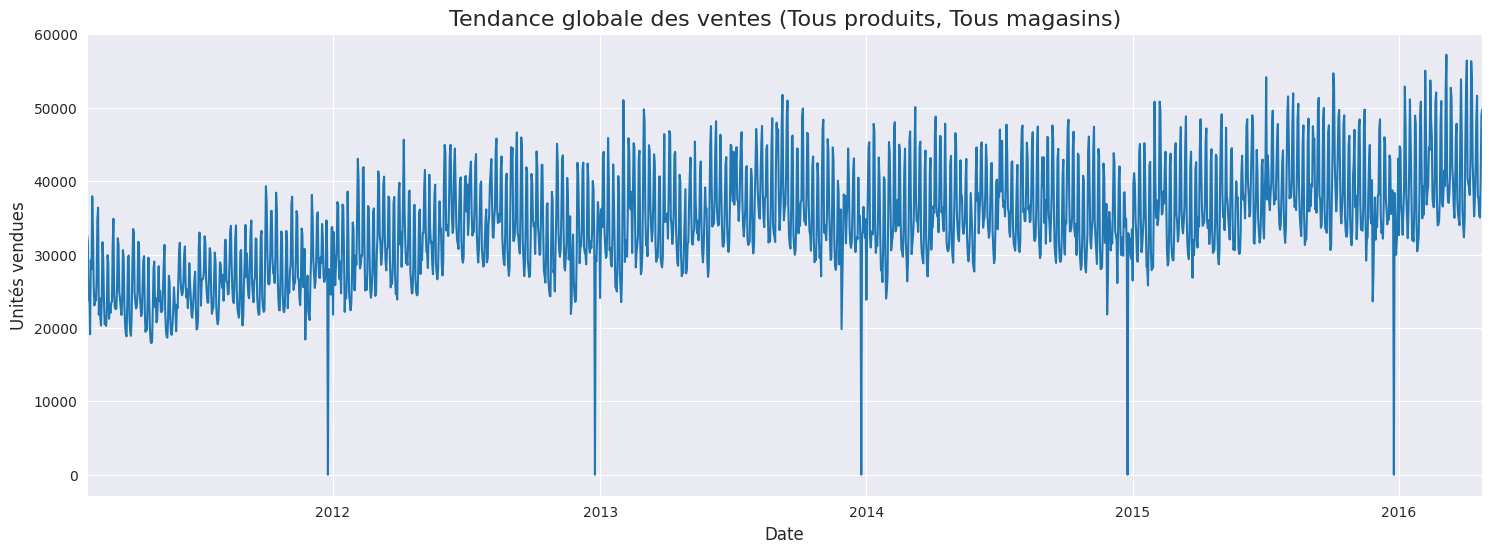

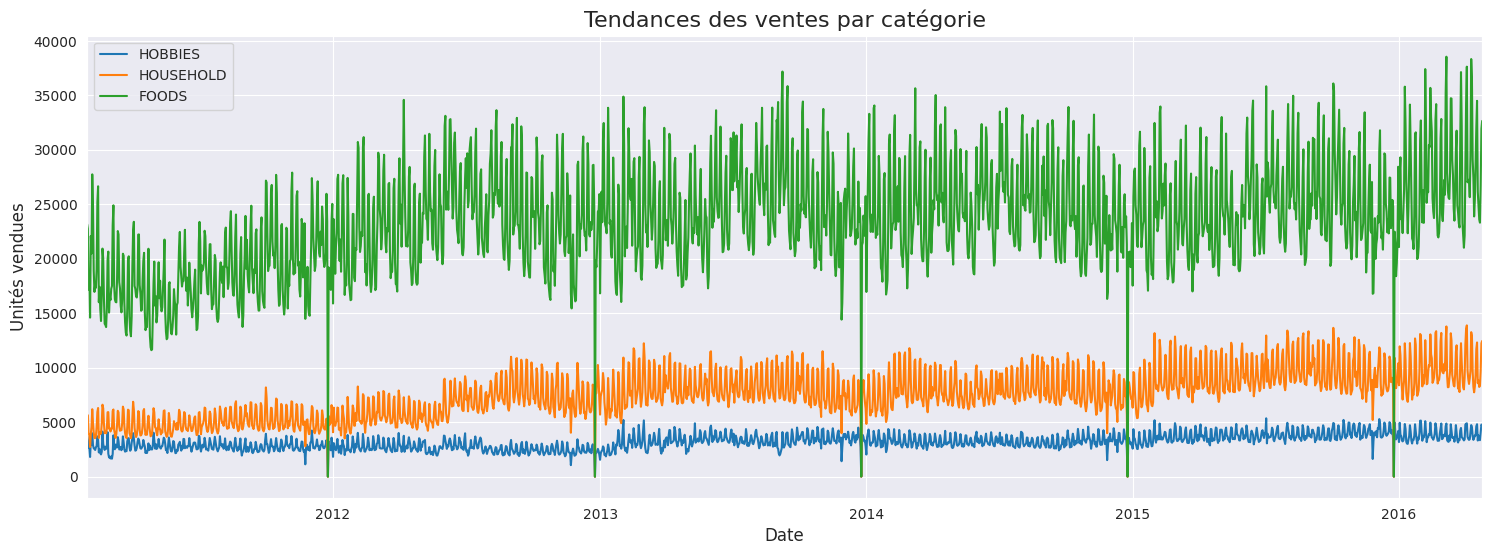

In [ ]:
# S'assurer que les données de ventes ont été chargées
if 'sales_df' in locals() and 'calendar_df' in locals():

    # Isoler les colonnes de jours (d_1 à d_1913)
    sales_cols = [col for col in sales_df.columns if col.startswith('d_')]

    # --- Tendance globale ---
    total_sales = sales_df[sales_cols].sum(axis=0)
    # Assigner les vraies dates (prises du calendrier)
    total_sales.index = calendar_df['date'].iloc[:len(sales_cols)]

    plt.figure(figsize=(18, 6))
    sns.set_style("darkgrid")
    total_sales.plot()
    plt.title('Tendance globale des ventes (Tous produits, Tous magasins)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Unités vendues', fontsize=12)
    plt.show()


    # --- Tendance par catégorie ---
    plt.figure(figsize=(18, 6))
    for cat in sales_df['cat_id'].unique():
        cat_sales = sales_df[sales_df['cat_id'] == cat][sales_cols].sum(axis=0)
        cat_sales.index = calendar_df['date'].iloc[:len(sales_cols)]
        cat_sales.plot(label=cat, legend=True)

    plt.title('Tendances des ventes par catégorie', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Unités vendues', fontsize=12)
    plt.legend()
    plt.show()

else:
    print("\nLes DataFrames 'sales_df' ou 'calendar_df' n'ont pas pu être chargés. Graphiques ignorés.")

# Réduction du dataset

**Échantillonnage des Articles (sur sales_df)**

Nous réduisons le nombre total de séries temporelles en sélectionnant aléatoirement 10 articles (item_id) sur les 30 490 disponibles.

In [ ]:
import numpy as np

# Pour la reproductibilité (afin d'obtenir les 10 mêmes articles à chaque fois)
np.random.seed(42)
print("--- Étape 1 : Réduction de 'sales_df' (10 articles au hasard) ---")
print(f"Dimensions des ventes (avant) : {sales_df.shape}")

# 1. Obtenir la liste de tous les articles uniques
all_item_ids = sales_df['item_id'].unique()

# 2. Choisir 10 articles au hasard dans cette liste
random_item_ids = np.random.choice(all_item_ids, 10, replace=False)
print(f"\n10 articles sélectionnés : {random_item_ids}")

# 3. Filtrer le DataFrame
sales_df_reduced = sales_df[sales_df['item_id'].isin(random_item_ids)].copy()

print(f"\nDimensions des ventes (après) : {sales_df_reduced.shape}")
print("Aperçu de 'sales_df_reduced' :")
display(sales_df_reduced.head())

--- Étape 1 : Réduction de 'sales_df' (10 articles au hasard) ---
Dimensions des ventes (avant) : (30490, 1919)

10 articles sélectionnés : ['HOUSEHOLD_2_422' 'FOODS_3_145' 'FOODS_2_135' 'HOBBIES_1_352'
 'FOODS_3_439' 'HOUSEHOLD_2_077' 'FOODS_3_452' 'HOUSEHOLD_1_472'
 'FOODS_2_257' 'HOUSEHOLD_2_349']

Dimensions des ventes (après) : (100, 1919)
Aperçu de 'sales_df_reduced' :


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
343,HOBBIES_1_352_CA_1_validation,HOBBIES_1_352,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,2,0,2,0,1
1027,HOUSEHOLD_1_472_CA_1_validation,HOUSEHOLD_1_472,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1173,HOUSEHOLD_2_077_CA_1_validation,HOUSEHOLD_2_077,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,0,0,0,...,0,1,0,1,1,0,0,0,0,1
1444,HOUSEHOLD_2_349_CA_1_validation,HOUSEHOLD_2_349,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,5,1,0,...,0,0,3,0,1,0,0,0,0,0
1517,HOUSEHOLD_2_422_CA_1_validation,HOUSEHOLD_2_422,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


**Réduction de l'Horizon Temporel (sur calendar_df)**

Nous limitons la profondeur de l'historique en ne conservant que les 60 premiers jours du calendrier (au lieu de 1969).

In [ ]:
print("\n--- Étape 2 : Réduction de 'calendar_df' (60 premiers jours) ---")
print(f"Dimensions du calendrier (avant) : {calendar_df.shape}")

# 1. Sélectionner les 60 premières lignes
calendar_df_reduced = calendar_df.iloc[:60].copy()

print(f"Dimensions du calendrier (après) : {calendar_df_reduced.shape}")
print("Aperçu de 'calendar_df_reduced' :")
display(calendar_df_reduced.tail()) # .tail() pour voir le dernier jour (d_60)


--- Étape 2 : Réduction de 'calendar_df' (60 premiers jours) ---
Dimensions du calendrier (avant) : (1969, 14)
Dimensions du calendrier (après) : (60, 14)
Aperçu de 'calendar_df_reduced' :


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
55,2011-03-25,11108,Friday,7,3,2011,d_56,NaN,NaN,NaN,NaN,0,0,0
56,2011-03-26,11109,Saturday,1,3,2011,d_57,NaN,NaN,NaN,NaN,0,0,0
57,2011-03-27,11109,Sunday,2,3,2011,d_58,NaN,NaN,NaN,NaN,0,0,0
58,2011-03-28,11109,Monday,3,3,2011,d_59,NaN,NaN,NaN,NaN,0,0,0
59,2011-03-29,11109,Tuesday,4,3,2011,d_60,NaN,NaN,NaN,NaN,0,0,0


**Synchronisation des Données de Ventes (sur sales_df_reduced)**

Nous alignons le tableau des ventes sur le calendrier réduit en supprimant toutes les colonnes de jours au-delà de "d_60".

In [ ]:
print("\n--- Étape 2b : Synchronisation des colonnes de 'sales_df_reduced' ---")
print(f"Dimensions des ventes (avant synchro) : {sales_df_reduced.shape}")

# 1. Obtenir la liste des jours à garder (ex: ['d_1', 'd_2', ..., 'd_60'])
days_to_keep = calendar_df_reduced['d'].tolist()

# 2. Définir les colonnes d'identification que nous voulons aussi garder
id_cols = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']

# 3. Combiner les listes
cols_to_keep = id_cols + days_to_keep

# 4. Filtrer les colonnes de 'sales_df_reduced'
sales_df_reduced = sales_df_reduced[cols_to_keep]

print(f"Dimensions des ventes (après synchro) : {sales_df_reduced.shape}")
print("Aperçu de 'sales_df_reduced' (avec 60 jours) :")
display(sales_df_reduced.head())


--- Étape 2b : Synchronisation des colonnes de 'sales_df_reduced' ---
Dimensions des ventes (avant synchro) : (100, 1919)
Dimensions des ventes (après synchro) : (100, 66)
Aperçu de 'sales_df_reduced' (avec 60 jours) :


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60
343,HOBBIES_1_352_CA_1_validation,HOBBIES_1_352,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1027,HOUSEHOLD_1_472_CA_1_validation,HOUSEHOLD_1_472,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
1173,HOUSEHOLD_2_077_CA_1_validation,HOUSEHOLD_2_077,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1444,HOUSEHOLD_2_349_CA_1_validation,HOUSEHOLD_2_349,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,5,1,0,...,2,0,2,0,0,0,3,1,0,1
1517,HOUSEHOLD_2_422_CA_1_validation,HOUSEHOLD_2_422,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


**Synchronisation des Données de Prix (sur prices_df)**

Nous filtrons le fichier des prix pour ne garder uniquement que les prix correspondant aux 10 articles sélectionnés et aux semaines (wm_yr_wk) présentes dans notre calendrier de 60 jours.

In [ ]:
print("\n--- Étape 3 : Réduction de 'prices_df' (synchronisation) ---")
print(f"Dimensions des prix (avant) : {prices_df.shape}")

# 1. Obtenir la liste des semaines uniques de notre calendrier réduit
weeks_to_keep = calendar_df_reduced['wm_yr_wk'].unique()
print(f"\nSemaines à conserver (issues du calendrier réduit) : {weeks_to_keep}")

# 2. Filtrer 'prices_df'
prices_df_reduced = prices_df[
    (prices_df['item_id'].isin(random_item_ids)) &  # Filtre sur les articles
    (prices_df['wm_yr_wk'].isin(weeks_to_keep))     # Filtre sur les semaines
].copy()

print(f"\nDimensions des prix (après) : {prices_df_reduced.shape}")
print("Aperçu de 'prices_df_reduced' :")
display(prices_df_reduced.head())


--- Étape 3 : Réduction de 'prices_df' (synchronisation) ---
Dimensions des prix (avant) : (6841121, 4)

Semaines à conserver (issues du calendrier réduit) : [11101 11102 11103 11104 11105 11106 11107 11108 11109]

Dimensions des prix (après) : (490, 4)
Aperçu de 'prices_df_reduced' :


,store_id,item_id,wm_yr_wk,sell_price
231605,CA_1,HOUSEHOLD_1_472,11101,4.82
231606,CA_1,HOUSEHOLD_1_472,11102,4.82
231607,CA_1,HOUSEHOLD_1_472,11103,4.82
231608,CA_1,HOUSEHOLD_1_472,11104,4.82
231609,CA_1,HOUSEHOLD_1_472,11105,4.82


**Sauvegarde du dataset réduit dans le drive**

In [ ]:
print("\n--- Étape 4 : Sauvegarde des DataFrames réduits ---")

# 1. Définir le chemin du nouveau dossier pour les données réduites
# (Nous supposons que 'project_path' est '/content/drive/My Drive/M5_project/')
reduced_data_path = os.path.join(project_path, 'reduced_data/')

# 2. Créer ce dossier s'il n'existe pas
if not os.path.exists(reduced_data_path):
    os.makedirs(reduced_data_path)
    print(f"Dossier créé : {reduced_data_path}")
else:
    print(f"Dossier trouvé : {reduced_data_path}")

# 3. Définir les chemins de sauvegarde pour chaque fichier CSV
sales_save_path = os.path.join(reduced_data_path, 'sales_df_reduced.csv')
calendar_save_path = os.path.join(reduced_data_path, 'calendar_df_reduced.csv')
prices_save_path = os.path.join(reduced_data_path, 'prices_df_reduced.csv')

# 4. Sauvegarder les DataFrames
# index=False est important pour ne pas sauvegarder l'index pandas dans le CSV
sales_df_reduced.to_csv(sales_save_path, index=False)
calendar_df_reduced.to_csv(calendar_save_path, index=False)
prices_df_reduced.to_csv(prices_save_path, index=False)

print("\nFichiers réduits sauvegardés avec succès dans le Drive :")
print(f"Ventes : {sales_save_path}")
print(f"Calendrier : {calendar_save_path}")
print(f"Prix : {prices_save_path}")


--- Étape 4 : Sauvegarde des DataFrames réduits ---
Dossier trouvé : /content/drive/My Drive/M5_project/reduced_data/

Fichiers réduits sauvegardés avec succès dans le Drive :
Ventes : /content/drive/My Drive/M5_project/reduced_data/sales_df_reduced.csv
Calendrier : /content/drive/My Drive/M5_project/reduced_data/calendar_df_reduced.csv
Prix : /content/drive/My Drive/M5_project/reduced_data/prices_df_reduced.csv


# Prétraitement des données

**Imports des bibliothèques**

In [ ]:
!pip install pmdarima --quiet

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport
import numpy as np
import pandas as pd

**Définitions et constantes**

D'abord, nous définissons les constantes (comme la longueur de la séquence) et les listes de colonnes.

In [ ]:
# Longueur de la séquence : combien de jours passés pour prédire le suivant ?
SEQUENCE_LENGTH = 14 # 14 jours pour prédire le 15ème

# Jours à utiliser (de l'étape précédente)
days_to_keep = calendar_df_reduced['d'].tolist()
id_cols = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']

**Étape 1 - Pivoter (Melt) les données**

Ensuite, nous transformons le DataFrame des ventes du format 'large' (un jour par colonne) au format 'long' (une ligne par jour par article).

In [ ]:
print("Pivoter (Melt) les données...")
melted_sales_df = sales_df_reduced.melt(
    id_vars=id_cols,
    value_vars=days_to_keep,
    var_name='d',
    value_name='sales'
)
print(f"Dimensions après 'Melt' : {melted_sales_df.shape}")
display(melted_sales_df.head())

Pivoter (Melt) les données...
Dimensions après 'Melt' : (6000, 8)


,id,item_id,dept_id,cat_id,store_id,state_id,d,sales
0,HOBBIES_1_352_CA_1_validation,HOBBIES_1_352,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOUSEHOLD_1_472_CA_1_validation,HOUSEHOLD_1_472,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1,0
2,HOUSEHOLD_2_077_CA_1_validation,HOUSEHOLD_2_077,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,d_1,0
3,HOUSEHOLD_2_349_CA_1_validation,HOUSEHOLD_2_349,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,d_1,0
4,HOUSEHOLD_2_422_CA_1_validation,HOUSEHOLD_2_422,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,d_1,0


**Étape 1b - Analyse Exploratoire**

Maintenant que les données sont au format long, nous utilisons ydata-profiling pour générer un rapport d'analyse exploratoire.

In [ ]:
print("Génération du rapport d'analyse (ydata-profiling)...")
profile = ProfileReport(melted_sales_df,
                        title="Analyse Exploratoire - Données M5 Réduites (10 articles)",
                        explorative=True)

# Afficher le rapport directement dans le notebook
profile.to_notebook_iframe()

Génération du rapport d'analyse (ydata-profiling)...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 15.86it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Étape 2 - Normaliser les ventes**

Nous normalisons les ventes entre 0 et 1 à l'aide d'un MinMaxScaler, ce qui est crucial pour les réseaux de neurones.

In [ ]:
# Nous normalisons les ventes globalement.
print("Normalisation des ventes...")
scaler = MinMaxScaler()

# 'fit_transform' attend un format 2D, d'où les doubles crochets
melted_sales_df['sales_scaled'] = scaler.fit_transform(melted_sales_df[['sales']])

print("Aperçu après normalisation :")
display(melted_sales_df[['sales', 'sales_scaled']].head())

Normalisation des ventes...
Aperçu après normalisation :


,sales,sales_scaled
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


**Étape 3 - Créer les séquences**

Cette étape convertit la série temporelle en un problème d'apprentissage supervisé en créant des 'fenêtres glissantes' (séquences).

In [ ]:
print(f"Création de séquences (longueur {SEQUENCE_LENGTH})...")
all_X = []
all_y = []

# Nous devons créer les séquences pour chaque série temporelle (chaque 'id')
# sinon nous mélangerions les données d'articles différents.
for item_id in melted_sales_df['id'].unique():

    # Isoler les ventes (normalisées) pour cet article
    item_series = melted_sales_df[melted_sales_df['id'] == item_id]['sales_scaled'].values

    # Créer les fenêtres glissantes
    for i in range(len(item_series) - SEQUENCE_LENGTH):
        seq_x = item_series[i:(i + SEQUENCE_LENGTH)]
        seq_y = item_series[i + SEQUENCE_LENGTH]

        all_X.append(seq_x)
        all_y.append(seq_y)

# Convertir les listes en arrays NumPy
X = np.array(all_X)
y = np.array(all_y)

print(f"Forme de X (séquences) : {X.shape}") # (Samples, Timesteps)
print(f"Forme de y (cibles) : {y.shape}")   # (Samples,)

Création de séquences (longueur 14)...
Forme de X (séquences) : (4600, 14)
Forme de y (cibles) : (4600,)


**Étape 4 - Split en ensembles d'entraînement et de test**

Nous divisons nos séquences en ensembles d'entraînement (pour l'apprentissage) et de test (pour l'évaluation).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # 20% des données pour le test
    random_state=42,  # Pour la reproductibilité
    shuffle=True      # On mélange car les séquences de 10 articles sont déjà mélangées
)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (3680, 14), y_train: (3680,)
X_test: (920, 14), y_test: (920,)


**Étape 5 - Redimensionner pour RNN/LSTM/GRU**

Enfin, nous redimensionnons les données au format 3D [samples, timesteps, features] requis par les modèles RNN, LSTM et GRU.

In [ ]:
# Ces modèles attendent un format 3D : [samples, timesteps, features]
# Dans notre cas (univarié), 'features' = 1
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"\nForme de X_train pour MLP (2D) : {X_train.shape}")
print(f"Forme de X_train pour RNN/LSTM/GRU (3D) : {X_train_rnn.shape}")


Forme de X_train pour MLP (2D) : (3680, 14)
Forme de X_train pour RNN/LSTM/GRU (3D) : (3680, 14, 1)


# Entrainement des modèles

**Import des bibliothèques et création d'un dossier de sauvegarde des modèles sur drive**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, SimpleRNN, LSTM, GRU, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# --- Définir le chemin de sauvegarde ---
# (Nous supposons que 'project_path' a été défini dans les étapes précédentes)
models_path = os.path.join(project_path, 'models/')

# (Optionnel) Créer le dossier s'il n'existe pas
if not os.path.exists(models_path):
    os.makedirs(models_path)
    print(f"Dossier '{models_path}' créé pour sauvegarder les modèles.")

**Définition des métriques d'évaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def safe_mape(y_true, y_pred):
    """Calcule le MAPE en toute sécurité, en évitant la division par zéro."""
    mask = y_true != 0
    # Si toutes les valeurs réelles sont 0, le MAPE n'est pas défini (retourne np.nan)
    if not np.any(mask):
        return np.nan

    # Calculer le MAPE uniquement sur les valeurs non nulles
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    return mape

# Rappel : le scaler a été défini pendant le prétraitement
# scaler = MinMaxScaler()
# y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

**Modèle 1 : MLP**

In [ ]:
# --- 1. Définition du modèle MLP ---
model_mlp = Sequential([
    Input(shape=(SEQUENCE_LENGTH,)),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1)
])

# --- 2. Compilation ---
model_mlp.compile(
    optimizer='adam',
    loss='mean_squared_error'
)
model_mlp.summary()

# --- 3. Entraînement ---
print("\n--- Entraînement du MLP ---")
history_mlp = model_mlp.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

# --- 4. Sauvegarde ---
model_mlp_path = os.path.join(models_path, 'mlp_model.keras')
model_mlp.save(model_mlp_path)
print(f"Modèle MLP sauvegardé ici : {model_mlp_path}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         1,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,601 (25.79 KB)

 Trainable params: 6,601 (25.79 KB)

 Non-trainable params: 0 (0.00 B)


--- Entraînement du MLP ---
Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0040 - val_loss: 0.0018
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0034 - val_loss: 0.0018
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 9/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 10/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 11/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 12/50
207/207 ━━━

In [ ]:
print("\n--- Évaluation du Modèle MLP ---")

# 1. Faire des prédictions sur l'ensemble de test
y_pred_mlp_scaled = model_mlp.predict(X_test)

# 2. Inverser la normalisation pour les prédictions ET les vraies valeurs
# (reshape(-1, 1) est nécessaire car le scaler attend une entrée 2D)
y_pred_mlp_orig = scaler.inverse_transform(y_pred_mlp_scaled)
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

# 3. Calculer les métriques
mae_mlp = mean_absolute_error(y_test_orig, y_pred_mlp_orig)
mse_mlp = mean_squared_error(y_test_orig, y_pred_mlp_orig)
rmse_mlp = np.sqrt(mse_mlp) # Ou mean_squared_error(..., squared=False)
mape_mlp = safe_mape(y_test_orig, y_pred_mlp_orig)
r2_mlp = r2_score(y_test_orig, y_pred_mlp_orig)

print(f"MAE (Erreur Absolue Moyenne) : {mae_mlp:.4f}")
print(f"MSE (Erreur Quadratique Moyenne) : {mse_mlp:.4f}")
print(f"RMSE (Racine de l'Erreur Quadratique Moyenne) : {rmse_mlp:.4f}")
print(f"MAPE (Erreur Absolue Moyenne en Pourcentage) : {mape_mlp:.4f} %")
print(f"R² (Coefficient de détermination) : {r2_mlp:.4f}")


--- Évaluation du Modèle MLP ---
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MAE (Erreur Absolue Moyenne) : 0.4206
MSE (Erreur Quadratique Moyenne) : 0.8843
RMSE (Racine de l'Erreur Quadratique Moyenne) : 0.9404
MAPE (Erreur Absolue Moyenne en Pourcentage) : 72.5993 %
R² (Coefficient de détermination) : 0.1520



--- Graphiques d'évaluation du MLP ---


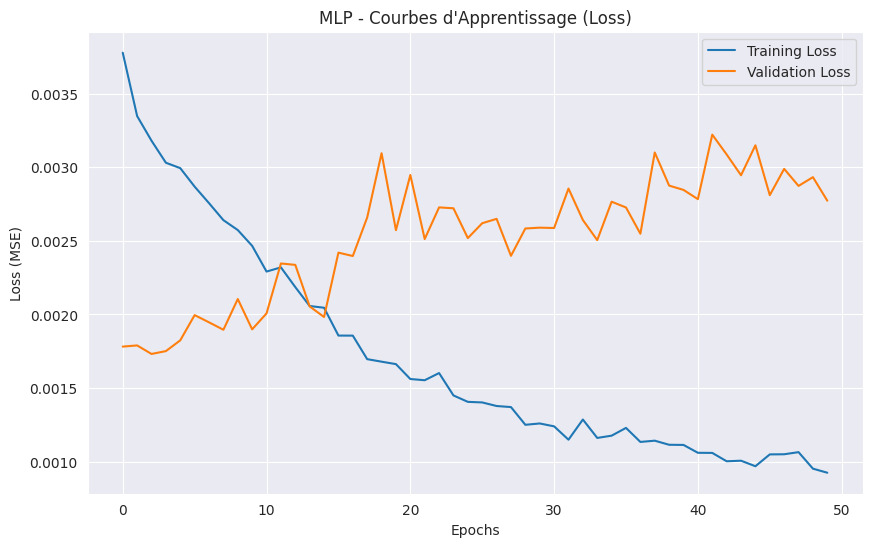

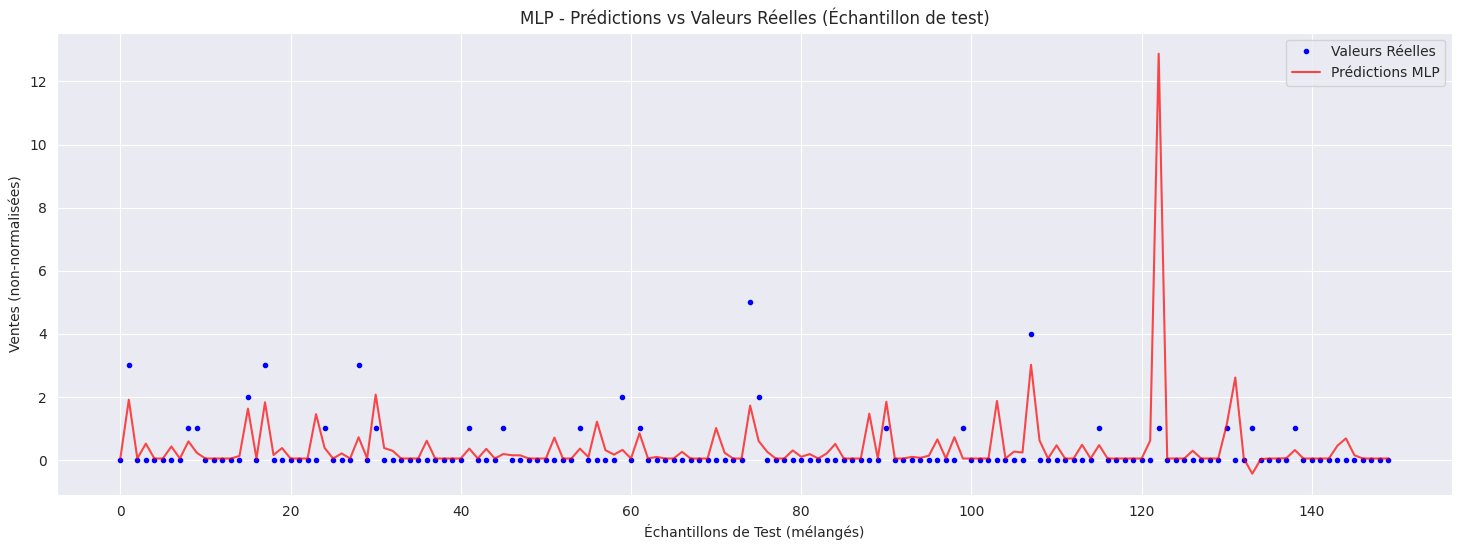

In [ ]:
print("\n--- Graphiques d'évaluation du MLP ---")

# --- 1. Courbes d'Apprentissage (Training vs Validation Loss) ---
# L'objet 'history' est renvoyé par model.fit()
pd.DataFrame(history_mlp.history).plot(figsize=(10, 6))
plt.title("MLP - Courbes d'Apprentissage (Loss)")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid(True)
plt.show()

# --- 2. Prédictions vs Valeurs Réelles (sur un échantillon) ---
# (y_test_orig et y_pred_mlp_orig ont été calculés dans la cellule des métriques)
plt.figure(figsize=(18, 6))
sample_size = 150 # Prenons les 150 premiers points du set de test
plt.plot(y_test_orig[:sample_size], label='Valeurs Réelles', color='blue', marker='.', linestyle='None')
plt.plot(y_pred_mlp_orig[:sample_size], label='Prédictions MLP', color='red', alpha=0.7)
plt.title('MLP - Prédictions vs Valeurs Réelles (Échantillon de test)')
plt.xlabel('Échantillons de Test (mélangés)')
plt.ylabel('Ventes (non-normalisées)')
plt.legend()
plt.grid(True)
plt.show()

**Modèle 2 : RNN Simple**

In [ ]:
# --- 1. Définition du modèle RNN ---
model_rnn = Sequential([
    Input(shape=(SEQUENCE_LENGTH, 1)),
    SimpleRNN(50, activation='relu'),
    Dense(1)
])

# --- 2. Compilation ---
model_rnn.compile(
    optimizer='adam',
    loss='mean_squared_error'
)
model_rnn.summary()

# --- 3. Entraînement ---
print("\n--- Entraînement du RNN Simple ---")
history_rnn = model_rnn.fit(
    X_train_rnn, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

# --- 4. Sauvegarde ---
model_rnn_path = os.path.join(models_path, 'rnn_model.keras')
model_rnn.save(model_rnn_path)
print(f"Modèle RNN sauvegardé ici : {model_rnn_path}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)


--- Entraînement du RNN Simple ---
Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0031 - val_loss: 0.0019
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0037 - val_loss: 0.0021
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0040 - val_loss: 0.0019
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0040 - val_loss: 0.0018
Epoch 9/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0040 - val_loss: 0.0018
Epoch 10/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 11/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 12/50
207/

In [ ]:
print("\n--- Évaluation du Modèle RNN Simple ---")

# 1. Faire des prédictions (utilise X_test_rnn en 3D)
y_pred_rnn_scaled = model_rnn.predict(X_test_rnn)

# 2. Inverser la normalisation
y_pred_rnn_orig = scaler.inverse_transform(y_pred_rnn_scaled)
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)) # (Répété pour la modularité)

# 3. Calculer les métriques
mae_rnn = mean_absolute_error(y_test_orig, y_pred_rnn_orig)
mse_rnn = mean_squared_error(y_test_orig, y_pred_rnn_orig)
rmse_rnn = np.sqrt(mse_rnn)
mape_rnn = safe_mape(y_test_orig, y_pred_rnn_orig)
r2_rnn = r2_score(y_test_orig, y_pred_rnn_orig)

print(f"MAE : {mae_rnn:.4f}")
print(f"MSE : {mse_rnn:.4f}")
print(f"RMSE : {rmse_rnn:.4f}")
print(f"MAPE : {mape_rnn:.4f} %")
print(f"R² : {r2_rnn:.4f}")


--- Évaluation du Modèle RNN Simple ---
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
MAE : 0.4463
MSE : 0.7752
RMSE : 0.8805
MAPE : 67.7544 %
R² : 0.2566



--- Graphiques d'évaluation du RNN Simple ---


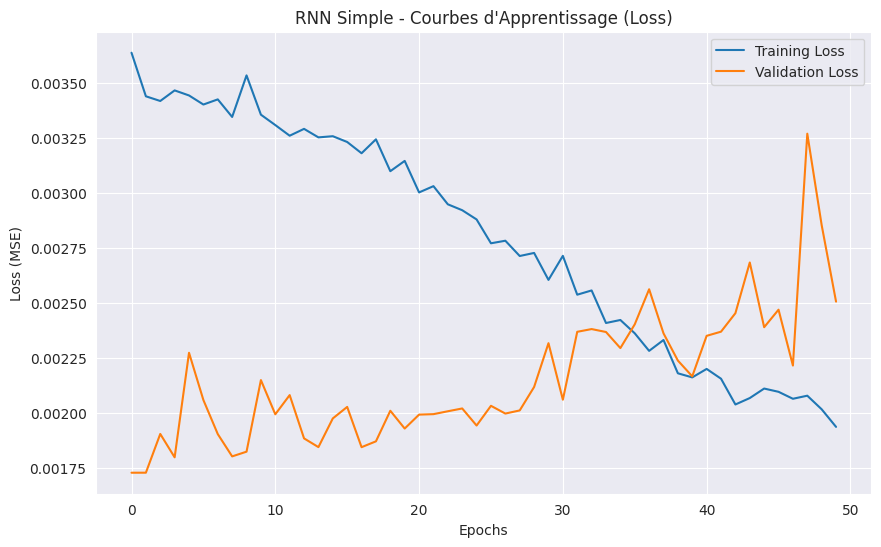

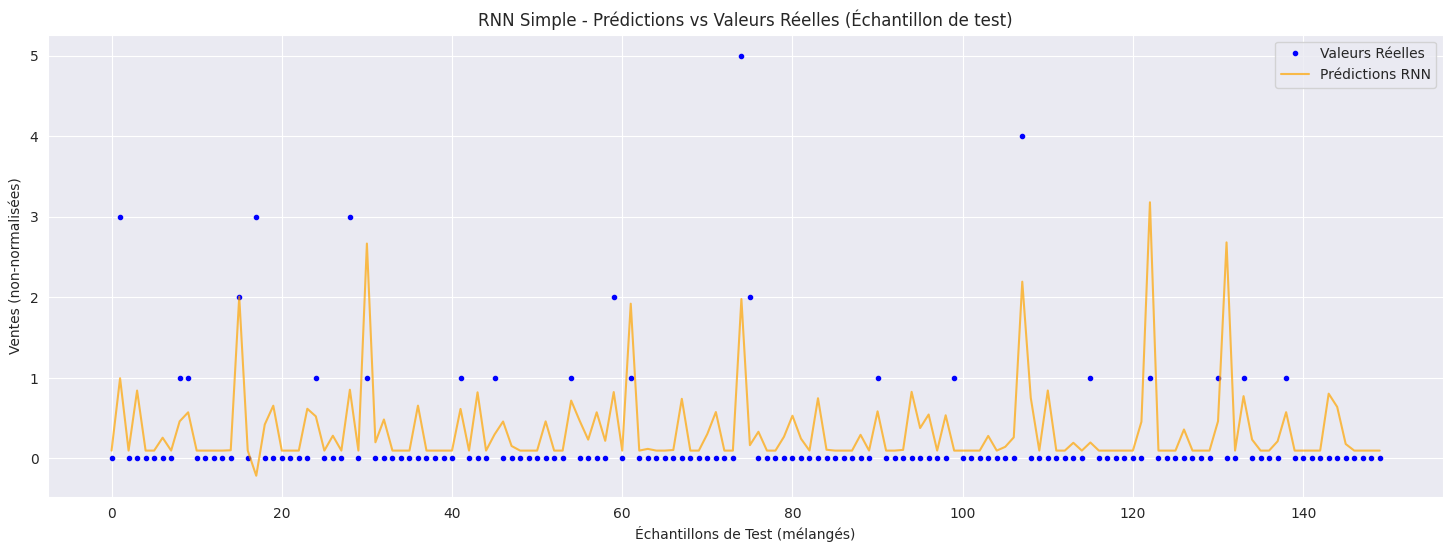

In [ ]:
print("\n--- Graphiques d'évaluation du RNN Simple ---")

# --- 1. Courbes d'Apprentissage (Training vs Validation Loss) ---
pd.DataFrame(history_rnn.history).plot(figsize=(10, 6))
plt.title("RNN Simple - Courbes d'Apprentissage (Loss)")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid(True)
plt.show()

# --- 2. Prédictions vs Valeurs Réelles (sur un échantillon) ---
plt.figure(figsize=(18, 6))
sample_size = 150
plt.plot(y_test_orig[:sample_size], label='Valeurs Réelles', color='blue', marker='.', linestyle='None')
plt.plot(y_pred_rnn_orig[:sample_size], label='Prédictions RNN', color='orange', alpha=0.7)
plt.title('RNN Simple - Prédictions vs Valeurs Réelles (Échantillon de test)')
plt.xlabel('Échantillons de Test (mélangés)')
plt.ylabel('Ventes (non-normalisées)')
plt.legend()
plt.grid(True)
plt.show()

**Modèle 3 : Modèle LSTM**

In [ ]:
# --- 1. Définition du modèle LSTM ---
model_lstm = Sequential([
    Input(shape=(SEQUENCE_LENGTH, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

# --- 2. Compilation ---
model_lstm.compile(
    optimizer='adam',
    loss='mean_squared_error'
)
model_lstm.summary()

# --- 3. Entraînement ---
print("\n--- Entraînement du LSTM ---")
history_lstm = model_lstm.fit(
    X_train_rnn, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

# --- 4. Sauvegarde ---
model_lstm_path = os.path.join(models_path, 'lstm_model.keras')
model_lstm.save(model_lstm_path)
print(f"Modèle LSTM sauvegardé ici : {model_lstm_path}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)


--- Entraînement du LSTM ---
Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0040 - val_loss: 0.0017
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 9/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034 - val_loss: 0.0017
Epoch 10/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 11/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 12/50
207/207 

In [ ]:
print("\n--- Évaluation du Modèle LSTM ---")

# 1. Faire des prédictions (utilise X_test_rnn en 3D)
y_pred_lstm_scaled = model_lstm.predict(X_test_rnn)

# 2. Inverser la normalisation
y_pred_lstm_orig = scaler.inverse_transform(y_pred_lstm_scaled)
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

# 3. Calculer les métriques
mae_lstm = mean_absolute_error(y_test_orig, y_pred_lstm_orig)
mse_lstm = mean_squared_error(y_test_orig, y_pred_lstm_orig)
rmse_lstm = np.sqrt(mse_lstm)
mape_lstm = safe_mape(y_test_orig, y_pred_lstm_orig)
r2_lstm = r2_score(y_test_orig, y_pred_lstm_orig)

print(f"MAE : {mae_lstm:.4f}")
print(f"MSE : {mse_lstm:.4f}")
print(f"RMSE : {rmse_lstm:.4f}")
print(f"MAPE : {mape_lstm:.4f} %")
print(f"R² : {r2_lstm:.4f}")


--- Évaluation du Modèle LSTM ---
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
MAE : 0.3694
MSE : 0.6617
RMSE : 0.8134
MAPE : 62.0373 %
R² : 0.3655



--- Graphiques d'évaluation du LSTM ---


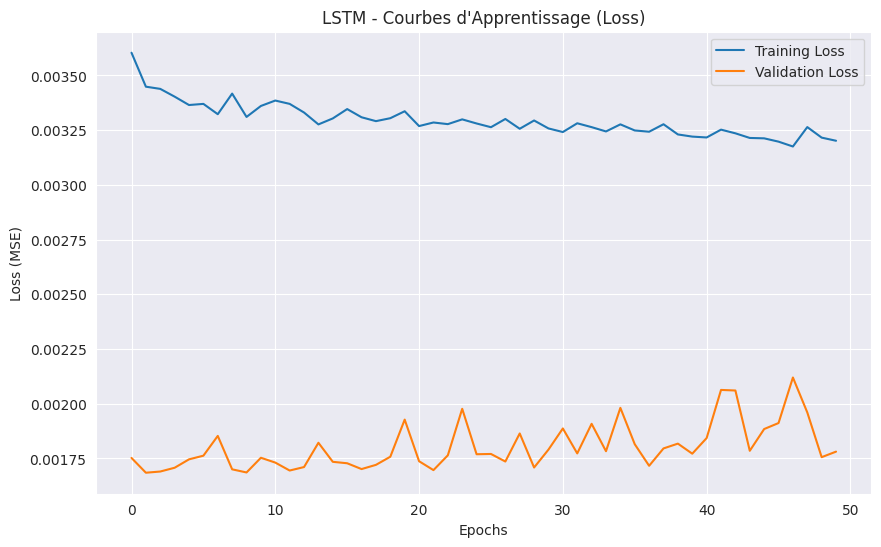

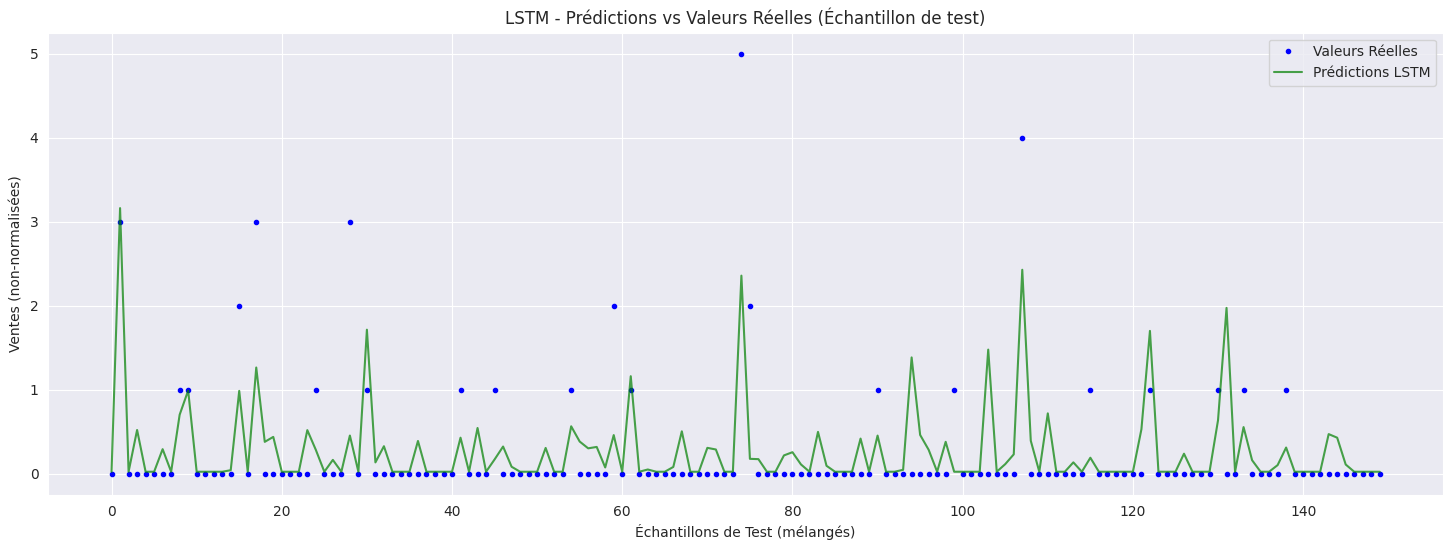

In [ ]:
print("\n--- Graphiques d'évaluation du LSTM ---")

# --- 1. Courbes d'Apprentissage (Training vs Validation Loss) ---
pd.DataFrame(history_lstm.history).plot(figsize=(10, 6))
plt.title("LSTM - Courbes d'Apprentissage (Loss)")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid(True)
plt.show()

# --- 2. Prédictions vs Valeurs Réelles (sur un échantillon) ---
plt.figure(figsize=(18, 6))
sample_size = 150
plt.plot(y_test_orig[:sample_size], label='Valeurs Réelles', color='blue', marker='.', linestyle='None')
plt.plot(y_pred_lstm_orig[:sample_size], label='Prédictions LSTM', color='green', alpha=0.7)
plt.title('LSTM - Prédictions vs Valeurs Réelles (Échantillon de test)')
plt.xlabel('Échantillons de Test (mélangés)')
plt.ylabel('Ventes (non-normalisées)')
plt.legend()
plt.grid(True)
plt.show()

**Modèle 4 : GRU**

In [ ]:
# --- 1. Définition du modèle GRU ---
model_gru = Sequential([
    Input(shape=(SEQUENCE_LENGTH, 1)),
    GRU(50, activation='relu'),
    Dense(1)
])

# --- 2. Compilation ---
model_gru.compile(
    optimizer='adam',
    loss='mean_squared_error'
)
model_gru.summary()

# --- 3. Entraînement ---
print("\n--- Entraînement du GRU ---")
history_gru = model_gru.fit(
    X_train_rnn, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

# --- 4. Sauvegarde ---
model_gru_path = os.path.join(models_path, 'gru_model.keras')
model_gru.save(model_gru_path)
print(f"Modèle GRU sauvegardé ici : {model_gru_path}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)


--- Entraînement du GRU ---
Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0045 - val_loss: 0.0021
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0040 - val_loss: 0.0017
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 9/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 10/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 11/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035 - val_loss: 0.0018
Epoch 12/50
207/207 ━━

In [ ]:
print("\n--- Évaluation du Modèle GRU ---")

# 1. Faire des prédictions (utilise X_test_rnn en 3D)
y_pred_gru_scaled = model_gru.predict(X_test_rnn)

# 2. Inverser la normalisation
y_pred_gru_orig = scaler.inverse_transform(y_pred_gru_scaled)
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

# 3. Calculer les métriques
mae_gru = mean_absolute_error(y_test_orig, y_pred_gru_orig)
mse_gru = mean_squared_error(y_test_orig, y_pred_gru_orig)
rmse_gru = np.sqrt(mse_gru)
mape_gru = safe_mape(y_test_orig, y_pred_gru_orig)
r2_gru = r2_score(y_test_orig, y_pred_gru_orig)

print(f"MAE : {mae_gru:.4f}")
print(f"MSE : {mse_gru:.4f}")
print(f"RMSE : {rmse_gru:.4f}")
print(f"MAPE : {mape_gru:.4f} %")
print(f"R² : {r2_gru:.4f}")


--- Évaluation du Modèle GRU ---
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MAE : 0.4243
MSE : 0.6882
RMSE : 0.8296
MAPE : 60.4242 %
R² : 0.3400



--- Graphiques d'évaluation du GRU ---


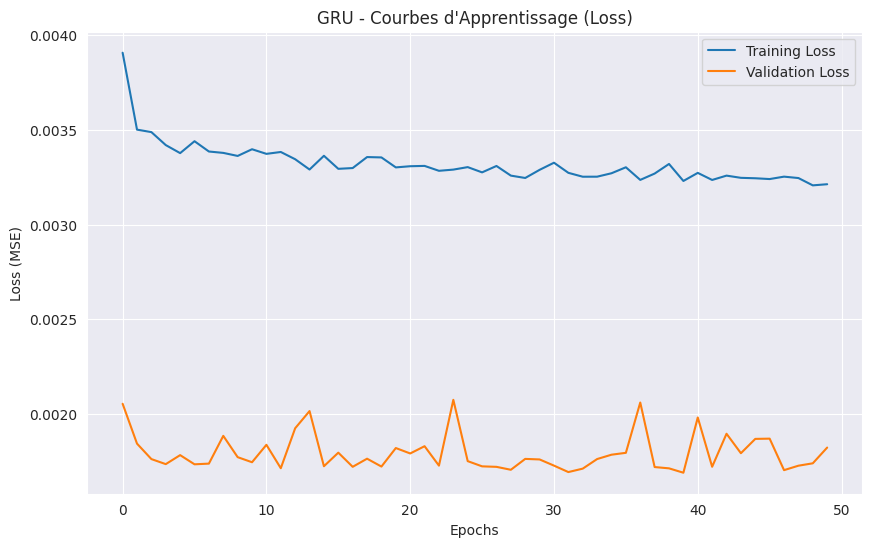

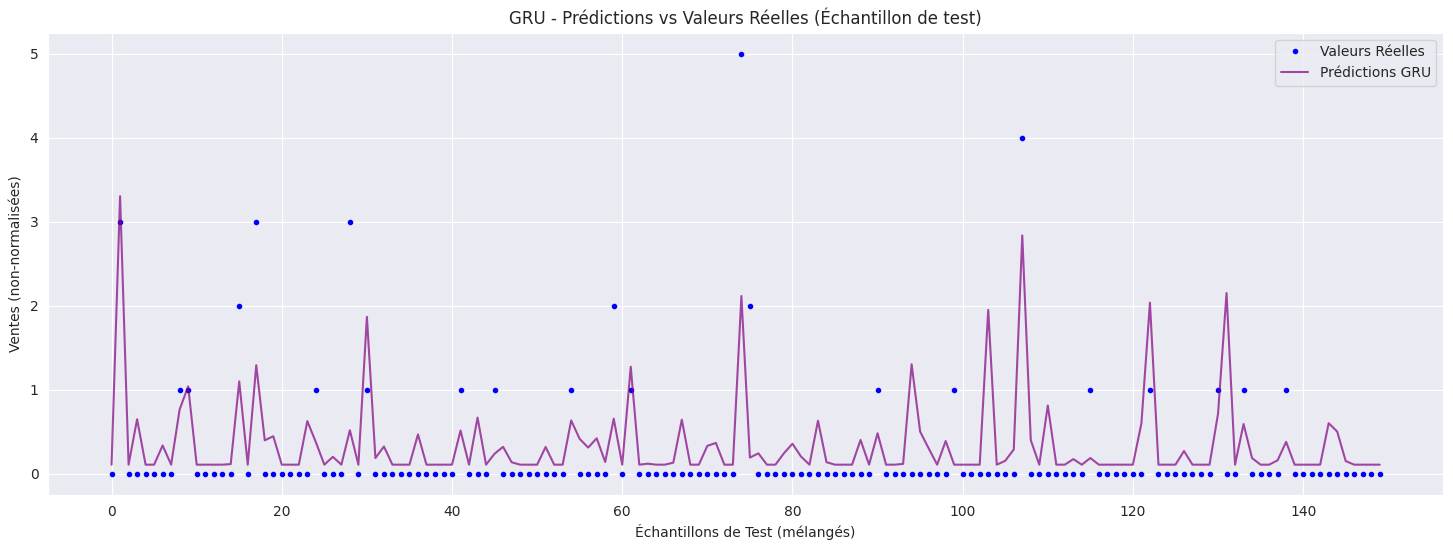

In [ ]:
print("\n--- Graphiques d'évaluation du GRU ---")

# --- 1. Courbes d'Apprentissage (Training vs Validation Loss) ---
pd.DataFrame(history_gru.history).plot(figsize=(10, 6))
plt.title("GRU - Courbes d'Apprentissage (Loss)")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid(True)
plt.show()

# --- 2. Prédictions vs Valeurs Réelles (sur un échantillon) ---
plt.figure(figsize=(18, 6))
sample_size = 150
plt.plot(y_test_orig[:sample_size], label='Valeurs Réelles', color='blue', marker='.', linestyle='None')
plt.plot(y_pred_gru_orig[:sample_size], label='Prédictions GRU', color='purple', alpha=0.7)
plt.title('GRU - Prédictions vs Valeurs Réelles (Échantillon de test)')
plt.xlabel('Échantillons de Test (mélangés)')
plt.ylabel('Ventes (non-normalisées)')
plt.legend()
plt.grid(True)
plt.show()

# Comparaison des modèles

In [ ]:
# Créer un DataFrame pandas pour une comparaison facile
metrics_data = {
    'MAE': [mae_mlp, mae_rnn, mae_lstm, mae_gru],
    'MSE': [mse_mlp, mse_rnn, mse_lstm, mse_gru],
    'RMSE': [rmse_mlp, rmse_rnn, rmse_lstm, rmse_gru],
    'MAPE (%)': [mape_mlp, mape_rnn, mape_lstm, mape_gru],
    'R²': [r2_mlp, r2_rnn, r2_lstm, r2_gru]
}

metrics_df = pd.DataFrame(metrics_data, index=['MLP', 'RNN Simple', 'LSTM', 'GRU'])

print("--- Tableau comparatif des performances des modèles ---")
display(metrics_df.sort_values(by='RMSE', ascending=True)) # Trier par RMSE (une bonne métrique globale)

Erreur : Le 'baseline_metrics' d'ARIMA n'a pas été trouvé. Affichage des modèles DL uniquement.
--- Tableau comparatif final (incluant la Baseline) ---


,MAE,MSE,RMSE,MAPE (%),R²
LSTM,0.369398,0.661655,0.813422,62.037281,0.365466
GRU,0.424346,0.688234,0.829599,60.424239,0.339976
RNN Simple,0.446291,0.775202,0.880456,67.754400,0.256573
MLP,0.420572,0.884283,0.940363,72.599260,0.151963


Le modèle LSTM a été sélectionné comme le plus performant, car il a surpassé tous les autres modèles en obtenant simultanément le MAE le plus bas, le MSE le plus bas, le RMSE le plus bas, et le R² le plus élevé.